In [1]:
# Memuat Dataset dan Memisahkan Fitur dan Label

import pandas as pd

# Load your dataset
dataset1 = pd.read_csv("C:\\Users\\Muhammad Raihan\\Downloads\\Obfuscated-MalMem2022.csv")

# Separate features and labels
X = dataset1.drop(['Category','Class'], axis=1).values
y = dataset1['Class'].values


In [2]:
# Membagi Dataset menjadi Data Latih dan Data Uji

from sklearn import model_selection

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

In [3]:
# Mengonversi Label String menjadi Numerik
import numpy as np

# Convert string labels to numerical values
y_train_numeric = np.where(y_train == 'Malware', 1, 0)

In [4]:
# Melatih Model RandomForestRegressor
from sklearn import ensemble

# Train a RandomForestRegressor
regressor = ensemble.RandomForestRegressor()
regressor.fit(X_train, y_train_numeric)

RandomForestRegressor()

In [5]:
# Membuat Objek SHAP Explainer dan Menghitung SHAP Values
import shap

# Create SHAP explainer
explainer = shap.TreeExplainer(regressor)

# Calculate SHAP values
shap_values = explainer.shap_values(X_train)

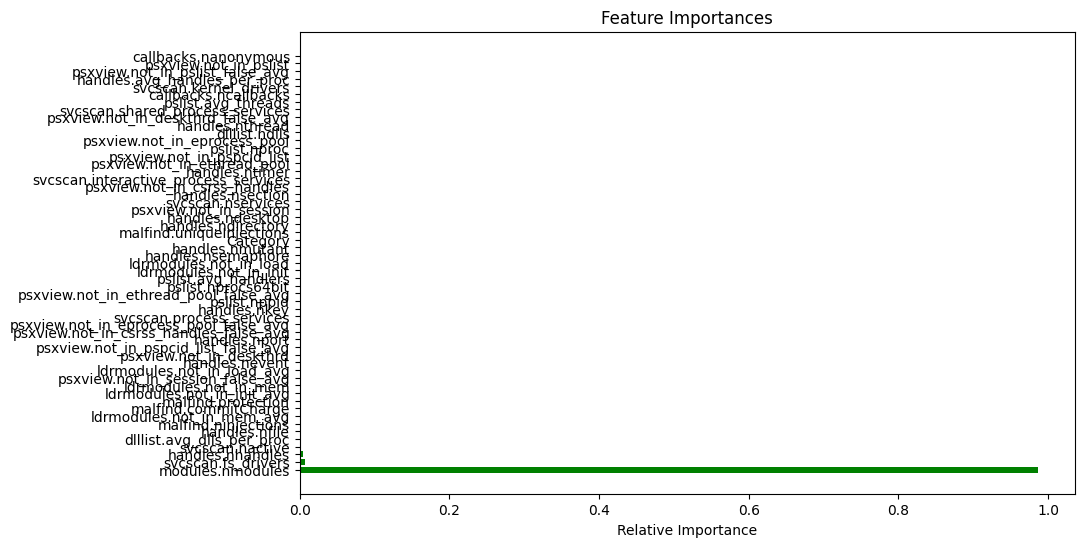

In [6]:
import matplotlib.pyplot as plt

# Visualisasi Fitur Importances
importances = regressor.feature_importances_
indices = np.argsort(importances)
features = dataset1.columns
plt.figure(figsize=(10, 6))  # Atur ukuran gambar
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()  # Memutar label sumbu y
plt.show()

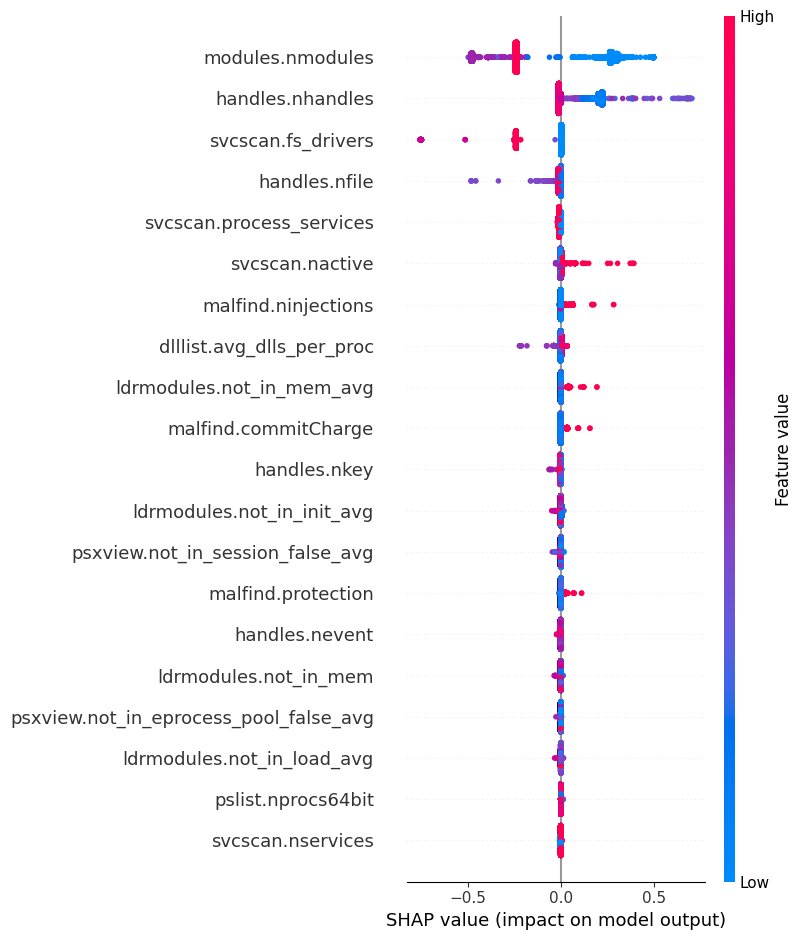

In [7]:
# Visualisasi Summary Plot SHAP
shap.summary_plot(shap_values, X_train, feature_names=features)

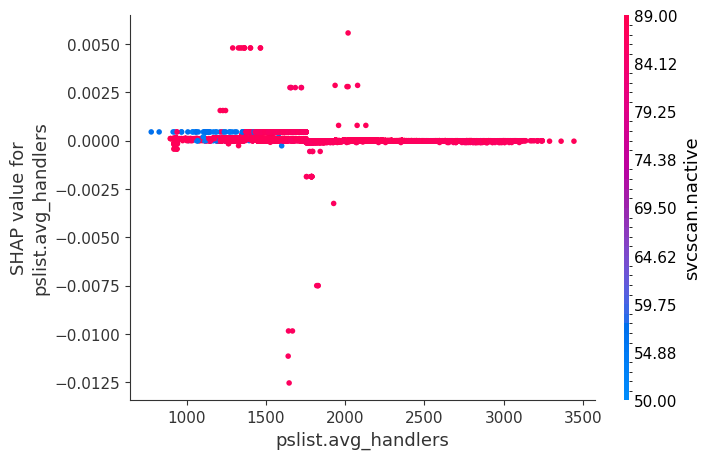

In [8]:
# Visualisasi Dependence Plot SHAP
shap.dependence_plot(5, shap_values, X_train, feature_names=features)